### Project Background and Motivation

There are so many resources on the internet for learning Data science and well as a vast number of machine learning techniques from simple linear regression to advanced deep learning based methods. It may be very confusing for someone trying to break into the field to get a grasp of exactly what to learn. Since I'm trying to break into the field myself, I decided to explore Kaggle's 2020 data science survey. It consists of about 20,000 responses, both from students and professionals about their age, education ,job roles and large variety of other profession related topics.In this analysis, I tried looking at the professionals and data science practices of companies, both large and small and try to find patterns in professionals within a job role and across job roles

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
col1=['darkgoldenrod','burlywood','cornsilk','palegreen','slateblue',
      'yellowgreen','olivedrab','mediumpurple','darkviolet']

#### Questions I will like to answer
+ Some general statistics about the survey respondents
+ Salary information 
+ Ages of data professionals
+ Gender distribution
+ Country of residence
+ Educational qualifications 
+ Data professionals accross different sized companies -count,salary
+ ML practices of companies
+ Development Environments - what IDEs are used
+ Most Popular hosted notebooks
+ Coding Experience accross different roles
+ Popular Coding Languages
+ Popular visualization libraries
+ How much ML experience is required
+ Popular machine learning Frameworks
+ Choice of learning platforms

In [5]:
path=r'C:\Satyaki\Github\Kaggle_2020_ds_survey'
os.chdir(path)
df=pd.read_csv('kaggle_survey_2020_responses.csv')
col_desc=dict(zip(df.columns.tolist(),df.iloc[0,:].tolist()))

# removing the top row since it contains column deescriptions
df=df.drop(0,axis=0)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 20036 rows and 355 columns


In [7]:
#col_desc

In [8]:
# Function to generate count plots for columns with propotions for each level
def gen_barplot(df,col,order=[]):
    '''accepts a dataframe and the name of a categorical column to generate barplot on'''
    '''order is an optional list that can be passed to the function in which bars in the barplot will be arranged'''
    '''Otherwise bars will be ordered from most frequent to least frequent'''
    col_count=df[col].value_counts()
    n_total=col_count.sum()
    col_order=col_count.index
    base_color=sns.color_palette()[0]
    
    # showing propotion on the bars
    if order==[]:
        sns.countplot(data=df,y=col,color=base_color,order=col_order)
        for i in range(len(col_count)):
            count=col_count[i]
            pct_string='{:0.1f}%'.format(100*count/n_total)
            plt.text(count+1,i,pct_string,va='center')
    else:
        sns.countplot(data=df,y=col,color=base_color,order=order)
        for i in range(len(order)):
            count=col_count[order[i]]
            pct_string='{:0.1f}%'.format(100*count/n_total)
            plt.text(count+1,i,pct_string,va='center')    

#### 1.1 Age of the survey respondents

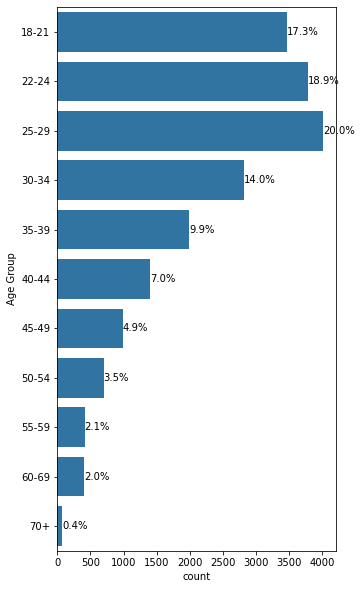

In [9]:
#Q1 Age of Respondents
plt.figure(figsize=(5,10))
or1=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']
gen_barplot(df=df,col='Q1',order=or1)
plt.ylabel('Age Group');

>As can be seen, about 69% respondents are below 35 years of age and 55% are below 30 years of age. This is inline with the fact that data professions came into the spotlight recently and majority of enthisiasts and practitioners are fairly young 

#### 1.2 Gender distribution of respondents

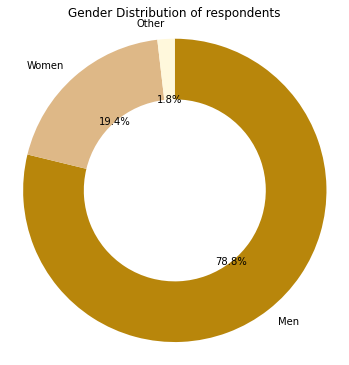

In [10]:
# Q2 
plt.figure(figsize=(6,8))
df['Q2']=df['Q2'].replace(['Prefer not to say','Prefer to self-describe','Nonbinary'],'other')
sorted_counts=df['Q2'].value_counts()
labels=['Men','Women','Other']

plt.pie(sorted_counts,labels=labels,autopct='%.1f%%',startangle=90,counterclock=False,wedgeprops={'width':0.4},colors=col1)
plt.axis('square');
plt.title('Gender Distribution of respondents');

>So roughly 78% respondents were men,19.4% were women and 1.8% other genders.

#### 1.3 Country of residence

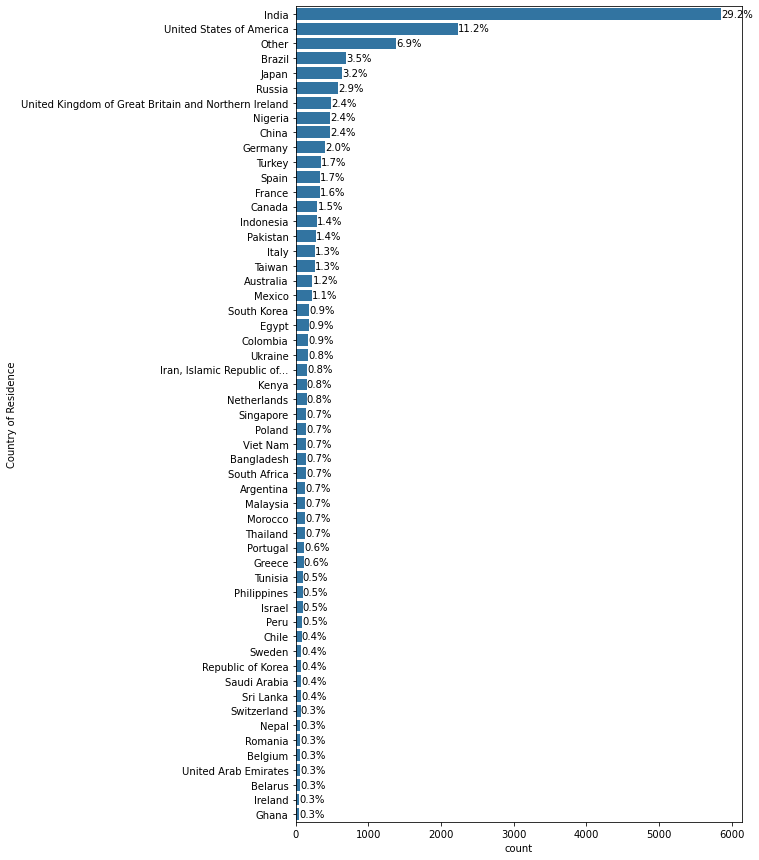

In [11]:

plt.figure(figsize=(8,15))
gen_barplot(df,'Q3')
plt.ylabel('Country of Residence');

>As can be seen maximum number of respondents are from India followed by US. Some of the statistics computed henceforth will point towards India or US,but that may also be due to sampling bias and it may be worthwhile to construct confidence intervals using bootstrap methods

### Criteria for being considered a Data Professional

For the purpose of this analysis, I'll consider anyone who has described their work in some form in Q23. There are a few people who seem to be employed, but haven't described their role. So I have omitted these people. The questions under Q23 were as follows

+ Analyze and understand data to influence product or business decisions

+ Build and/or run the data infrastructure that my business uses for storing, analyzing, and
  operationalizing data

+ Build prototypes to explore applying machine learning to new areas

+ Build and/or run a machine learning service that operationally improves my product or
  workflows

+ Experimentation and iteration to improve existing ML models

+ Do research that advances the state of the art of machine learning

+ None of these activities are an important part of my role at work

+ Other


### Separating out professionals from enthusiasts

In [12]:
# Getting list of questios for q23
Q23=[x for x in df.columns if 'Q23' in x]
Q23.remove('Q23_Part_7') # removing the none option
temp=df[Q23].notnull() # creating a dataframe that indicates whether a value is present in a cell
supp_vec=[True if any(temp.iloc[x,:]) else False for x in range(len(temp))] # creating list of booleans with which the dataframe will be filtered

prof=df[supp_vec].reset_index().drop('index',axis=1)
print('Number of respondents in the survey:',df.shape[0])
print('Number of professionals in the survey:',prof.shape[0])


Number of respondents in the survey: 20036
Number of professionals in the survey: 9142


In [13]:
# finding region wise salary category modes to impute missing values
countries=prof['Q3'].value_counts().index
x1=pd.DataFrame()

for country in countries:
    val=prof[prof['Q3']==country]['Q24'].mode().values[0]
    df1=prof[prof['Q3']==country]
    df1['Q24']=df1['Q24'].fillna(val)
    x1=x1.append(df1)
prof=x1
del(x1)

In [14]:
# cleaning the salary column
prof['Q24']=prof['Q24'].replace({'$0-999':'0-999','> $500,000':'500000-550000'})
prof['Q24']=prof['Q24'].apply(lambda x: x.replace(',',''))
sal_ll=prof['Q24'].apply(lambda x: int(x.split('-')[0])).astype('int')
sal_ul=prof['Q24'].apply(lambda x: int(x.split('-')[1])).astype('int')
prof['avg_compensation']=(sal_ll+sal_ul)/2
prof.drop('Q24',axis=1,inplace=True)
#print('Done!')

In [15]:
# cleaning the countries column to match country names in the big mac dictionary
prof['Q3'].replace({'United States of America':'United States'},inplace=True)

In [16]:
# converting salary to Purchasing power parity using BIGMAC Index
# since the items $100 can buy varies in different regions of the world
big_mac=pd.read_excel('global_big_mac_index.xlsx',sheet_name='Sheet1',header=None)
big_mac.columns=['Country','Price of big mac in USD']


# mac dict is the dictionary containing country names and the price of a mac in that country
# in case a country is not present in the list, the median value of big mac prices will be assumed for that country
mac_dict=defaultdict(lambda:big_mac['Price of big mac in USD'].median())
for r_num in range(big_mac.shape[0]):
    country=big_mac.loc[r_num,'Country']
    index=big_mac.loc[r_num,'Price of big mac in USD']
    mac_dict[country]=index
    
#Converting compensation to big mac units
prof['comp_mac']=np.round(prof['avg_compensation']/prof['Q3'].map(mac_dict),2)
#print('Done!')

#### 2.1  Visualizing the distribution of salaries

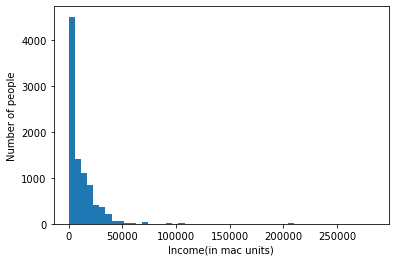

In [17]:
sns.distplot(prof['comp_mac'],kde=False,hist_kws={'alpha':1});
plt.xlabel('Income(in mac units)')
plt.ylabel('Number of people');

>As expected, the pay distribution right skewed with a long tail.Majority of the people have an income less than 50000 units while there are also people with pay of almost 300000 units

#### 2.2 Age of professionals

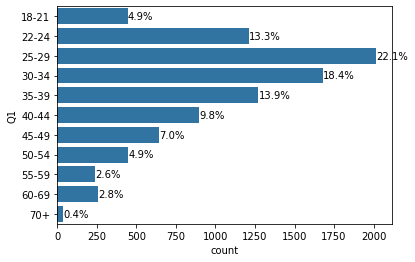

In [18]:
or1=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']
gen_barplot(df=prof,col='Q1',order=or1)

>Highest number of professionals fall in the 25-29 years age group consisting of about 22% of the population, with 30-34 years and 22-24 years forming the next two highest age groups with working people. Overall more than half of the population fall under 35 years of age

#### 2.3 Gender distribution of professionals

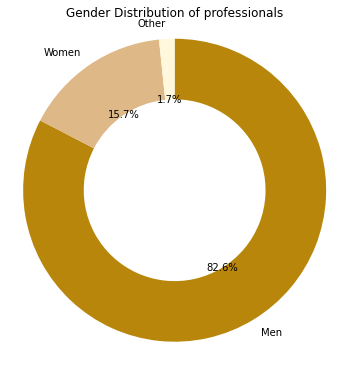

In [19]:

plt.figure(figsize=(6,8))
sorted_counts=prof['Q2'].value_counts()
labels=['Men','Women','Other']

plt.pie(sorted_counts,labels=labels,autopct='%.1f%%',startangle=90,counterclock=False,wedgeprops={'width':0.4},colors=col1)
plt.axis('square');
plt.title('Gender Distribution of professionals');

>As can be seen with many other technical fields, there are more men than women. The sample of working professionals consists of 82% men and 15% women

#### 2.4  Country of residence vs Pay

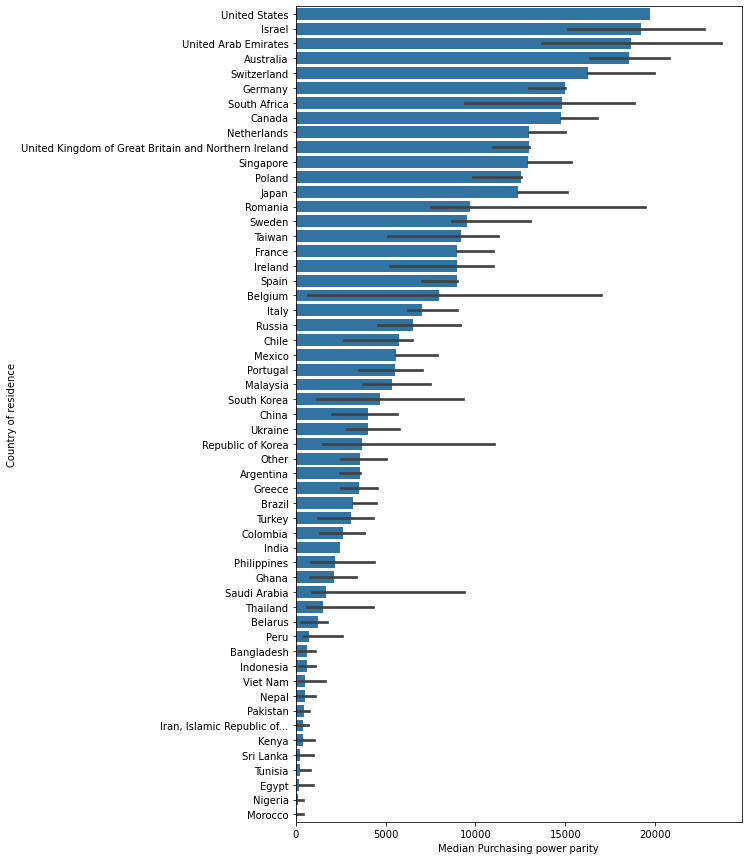

In [35]:
plt.figure(figsize=(8,15))
or1=prof.groupby('Q3').median()['comp_mac'].sort_values(ascending=False).index
base_color=sns.color_palette()[0]
sns.barplot(data=prof,y='Q3',x='comp_mac',estimator=np.median,color=base_color,order=or1)
plt.xlabel('Median Purchasing power parity')
plt.ylabel('Country of residence');

US, Israel,UAE,Australia and Switzerland are countries with highest median salaries in the world. PPP here is calculated based on the big mac index which is a widely used number for assesing PPP. All aspects of cost of living may not be represented well by the index, but it gives a good rough estimate of the highest paying places in the world

#### 2.5 Level of formal education

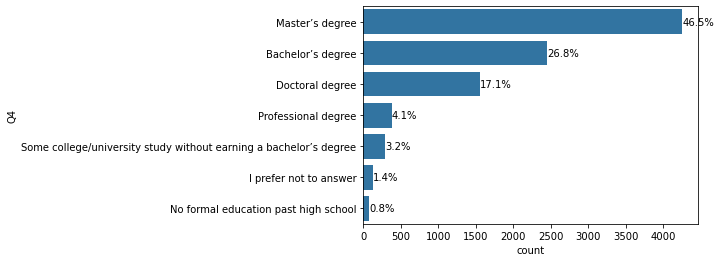

In [41]:
gen_barplot(df=prof,col='Q4')

>Most professionals seem to have a master's degree with bachelors and doctorate being the next 2 highest qualifications

#### 2.6 Distribution of job roles

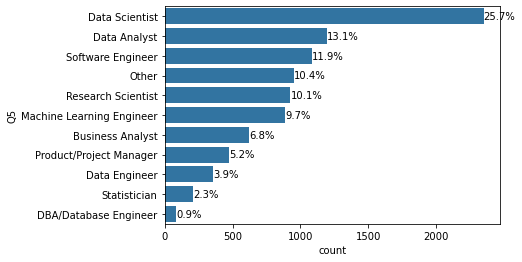

In [42]:
gen_barplot(df=prof,col='Q5')

>Data scientists consitute the largest chunk of the professionals who work with data. With almost 26% of the individuals working as data scientists, they are significantly ahead of data analysts and software engineers who consitute 13.1% and 12% of the population respectively

#### 2.7 Age and pay

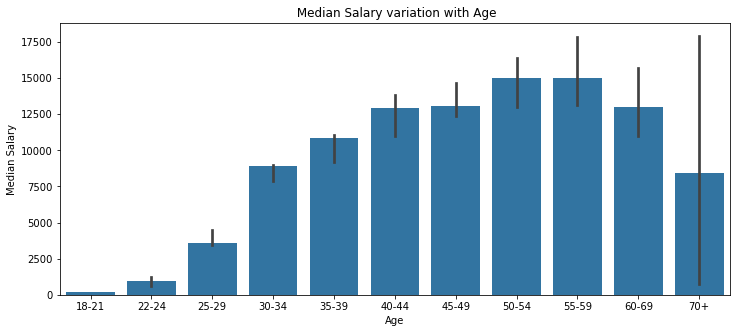

In [43]:
plt.figure(figsize=(12,5))
or1=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']
base_color=sns.color_palette()[0]
sns.barplot(data=prof,x='Q1',y='comp_mac',order=or1,color=base_color,estimator=np.median)
plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.title(' Median Salary variation with Age');

>So in general it seems that salary increases with age.There are salary variations in each group, with higher variations observed in the higher age groups.

#### 2.8 Responsibilities by Job Title

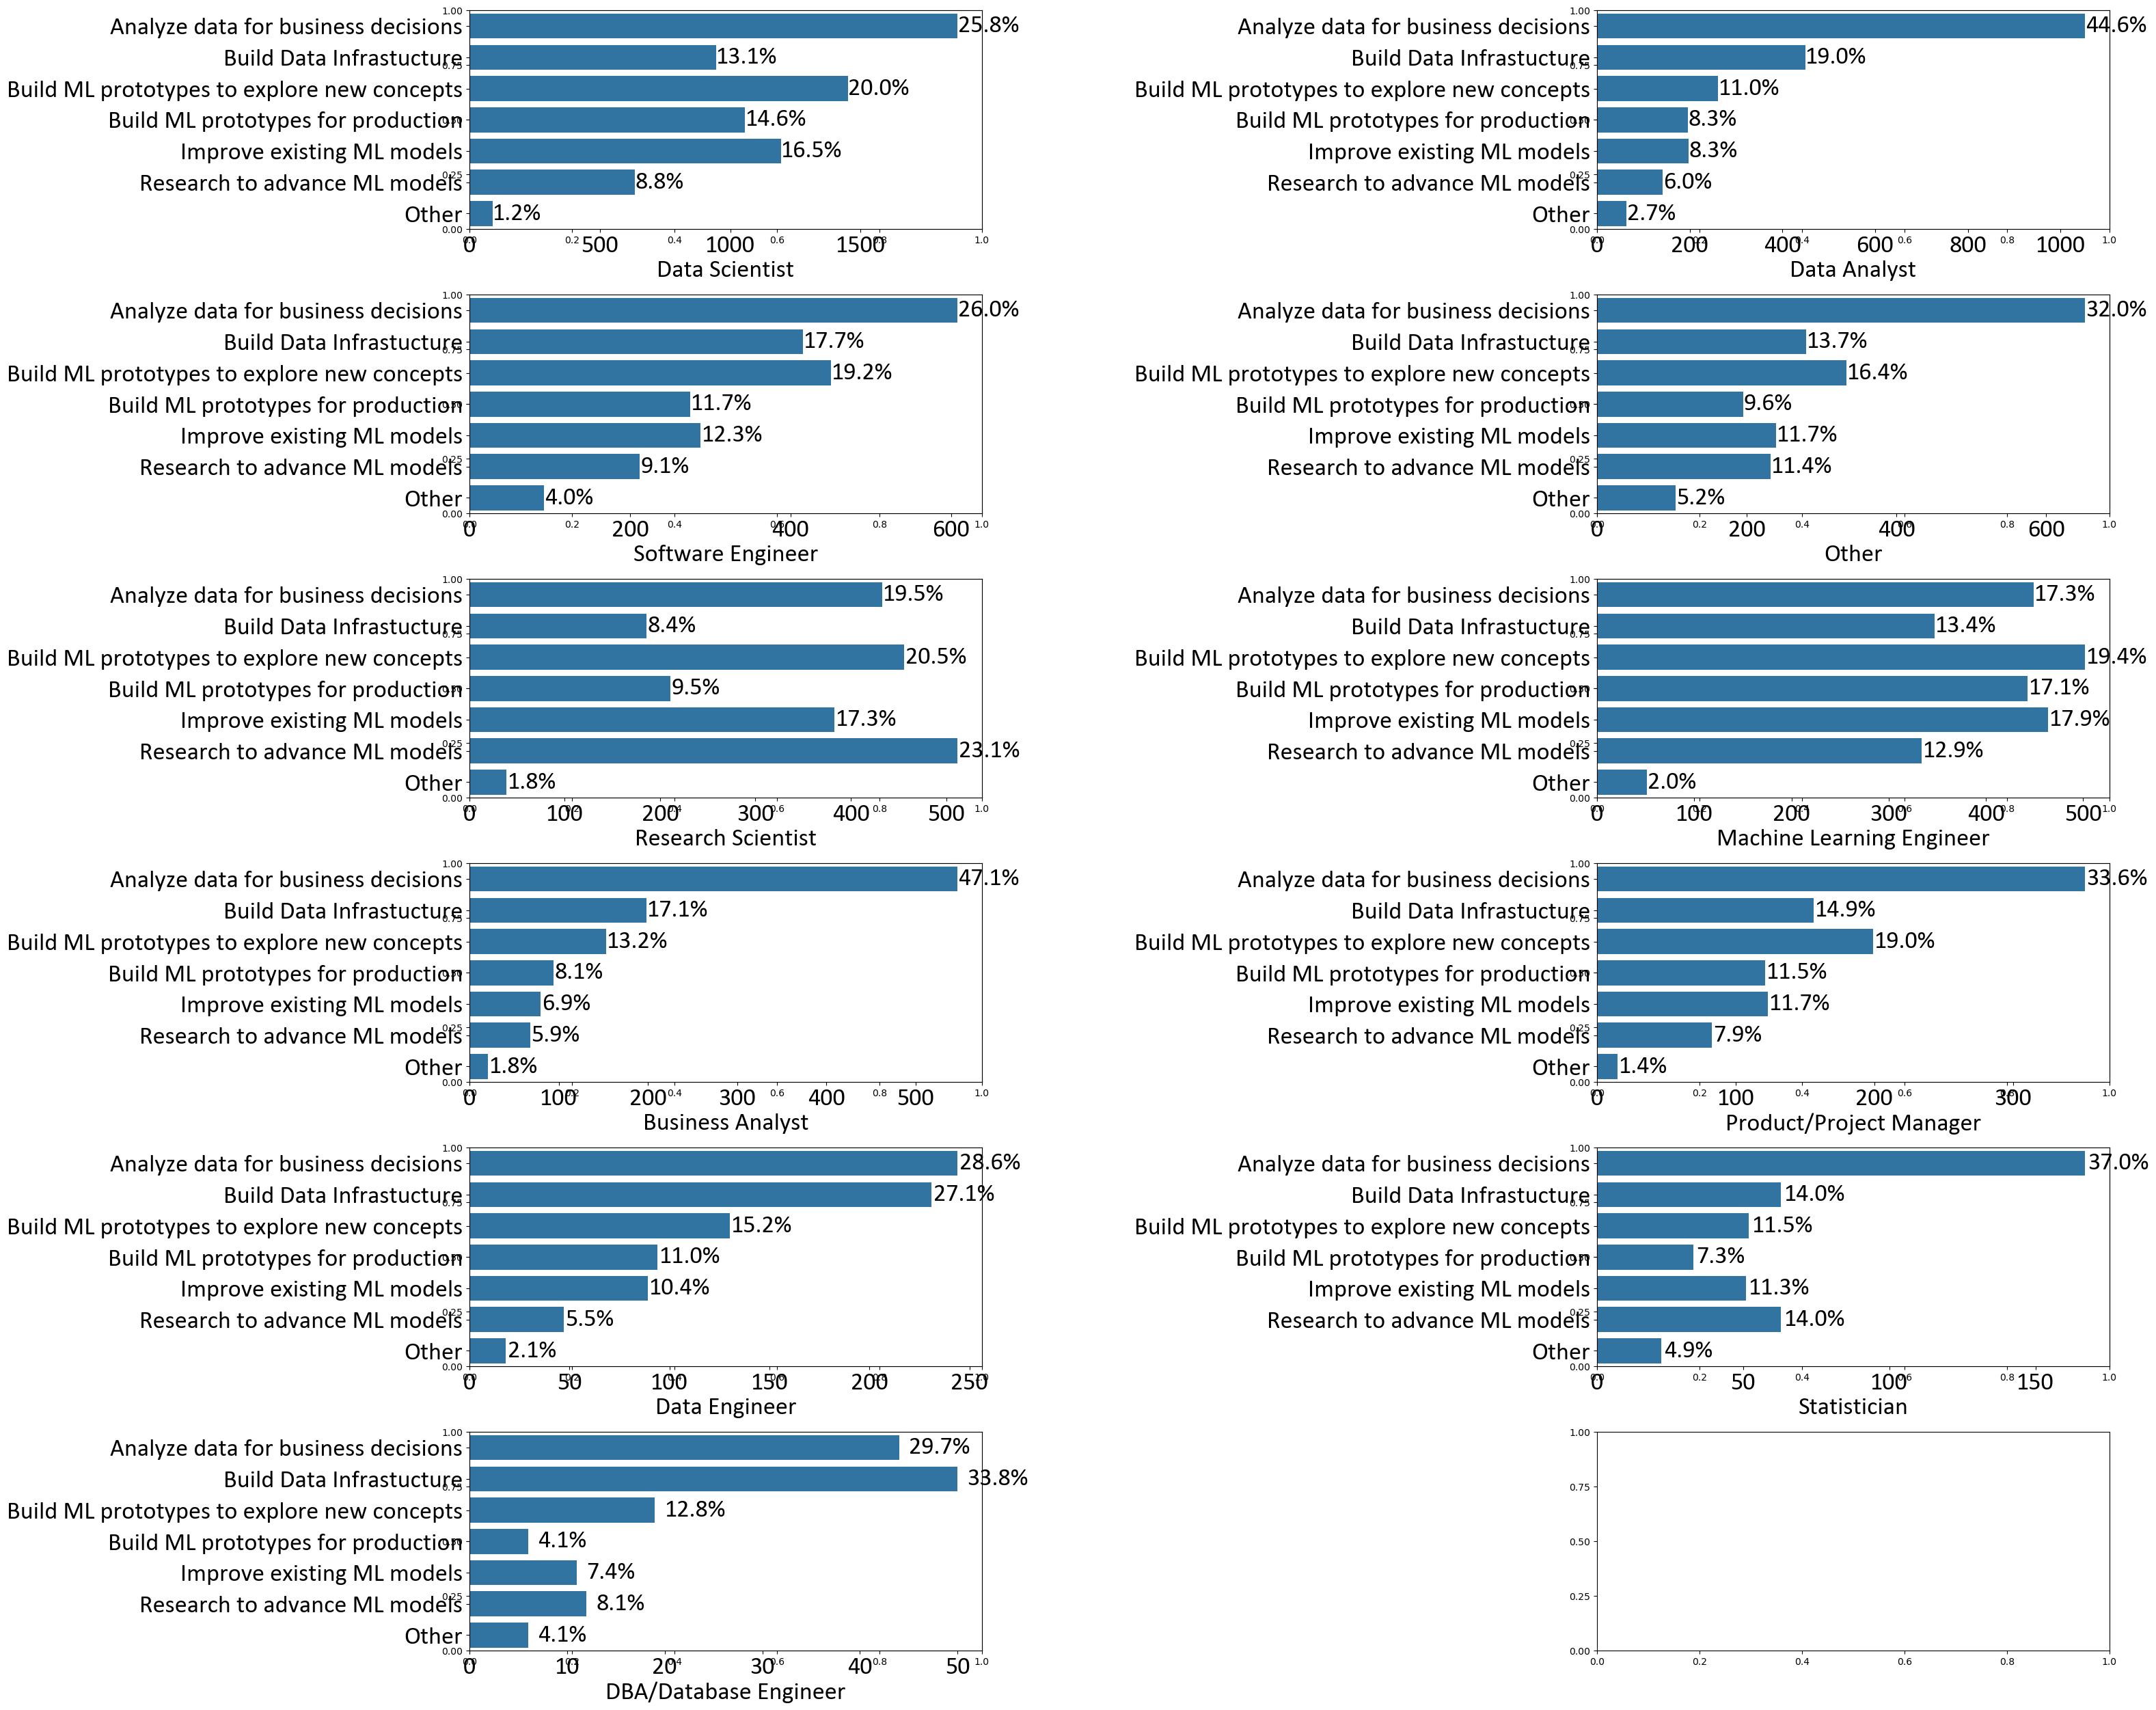

In [44]:
job_titles=prof['Q5'].value_counts().index
count_df=pd.DataFrame()

# Creating Dataframe to count responsibilities by job title
i=0
for title in job_titles:
    temp_df=prof[prof['Q5']==title]
    a=temp_df[Q23].count()
    idx=a.index
    count_df.loc[i,'Job_title']=title
    for x in idx:
        count_df.loc[i,x]=a[x]
    i+=1

# Shortening the job descriptions 
job_desc=['Job_title','Analyze data for business decisions','Build Data Infrastucture',
       'Build ML prototypes to explore new concepts','Build ML prototypes for production',
       'Improve existing ML models','Research to advance ML models','Other']


# Renaming columns in the count dataframe
count_df.columns=job_desc
count_df=count_df.set_index('Job_title')


# Creating facet plot for job title vs responsibilities
mpl.rcParams.update(mpl.rcParamsDefault)

#plt.figure(figsize=(8,12))
fig,ax=plt.subplots(6,2,figsize=(8,12))

# specifying label properties
font = {'family' : 'Calibri',
        'size'   :26}
mpl.rc('font', **font)

or1=['Analyze data for business decisions',
 'Build Data Infrastucture',
 'Build ML prototypes to explore new concepts',
 'Build ML prototypes for production',
 'Improve existing ML models',
 'Research to advance ML models',
 'Other']

i=1
for col in count_df.index:
    #plt.subplot(6,2,i)
    fig.add_subplot(6,2,i)
    col_counts=count_df.loc[col,:]
    sns.barplot(y=count_df.columns,x=count_df.loc[col,:],color=base_color,order=or1);

    # displaying propotions on the bars
    for j in range(len(or1)):
        count=col_counts[or1[j]]
        pct_string='{:0.1f}%'.format(100*count/col_counts.sum())
        plt.text(count+1,j,pct_string,va='center',color='black')
    i+=1

plt.subplots_adjust(right=3,top=2,left=0,bottom=0,wspace=1.2,hspace=0.3)

1. As is evident from the above plot, analyzing data for business decisions is the top responsibility accross all data   professions.  
  
2. Data Analyst and Business Analyst Roles seem very similar in terms of responsibility

3. Data Engineers and Database engineers seem to have very high priority in building data infrasrtucture which is low in other job roles  

4. Data scientists and machine learning engineers have the widest variety of responsibilities

#### 2.9 Job Title and Educational Qualification

In [45]:
#resetting matplotlib plotting parameters
mpl.rcParams.update(mpl.rcParamsDefault)

In [46]:
#Q4 and Q5
edu_counts=prof.groupby(['Q5','Q4']).count()['avg_compensation']
edu_counts=edu_counts.reset_index(name='count')
edu_counts=edu_counts.pivot(index='Q5',columns='Q4',values='count')

# Converting counts to percentages
for x in edu_counts.index:
    edu_counts.loc[x,:]=np.round(100*edu_counts.loc[x,:]/edu_counts.loc[x,:].sum(axis=0),2)
edu_counts.fillna(0,inplace=True)

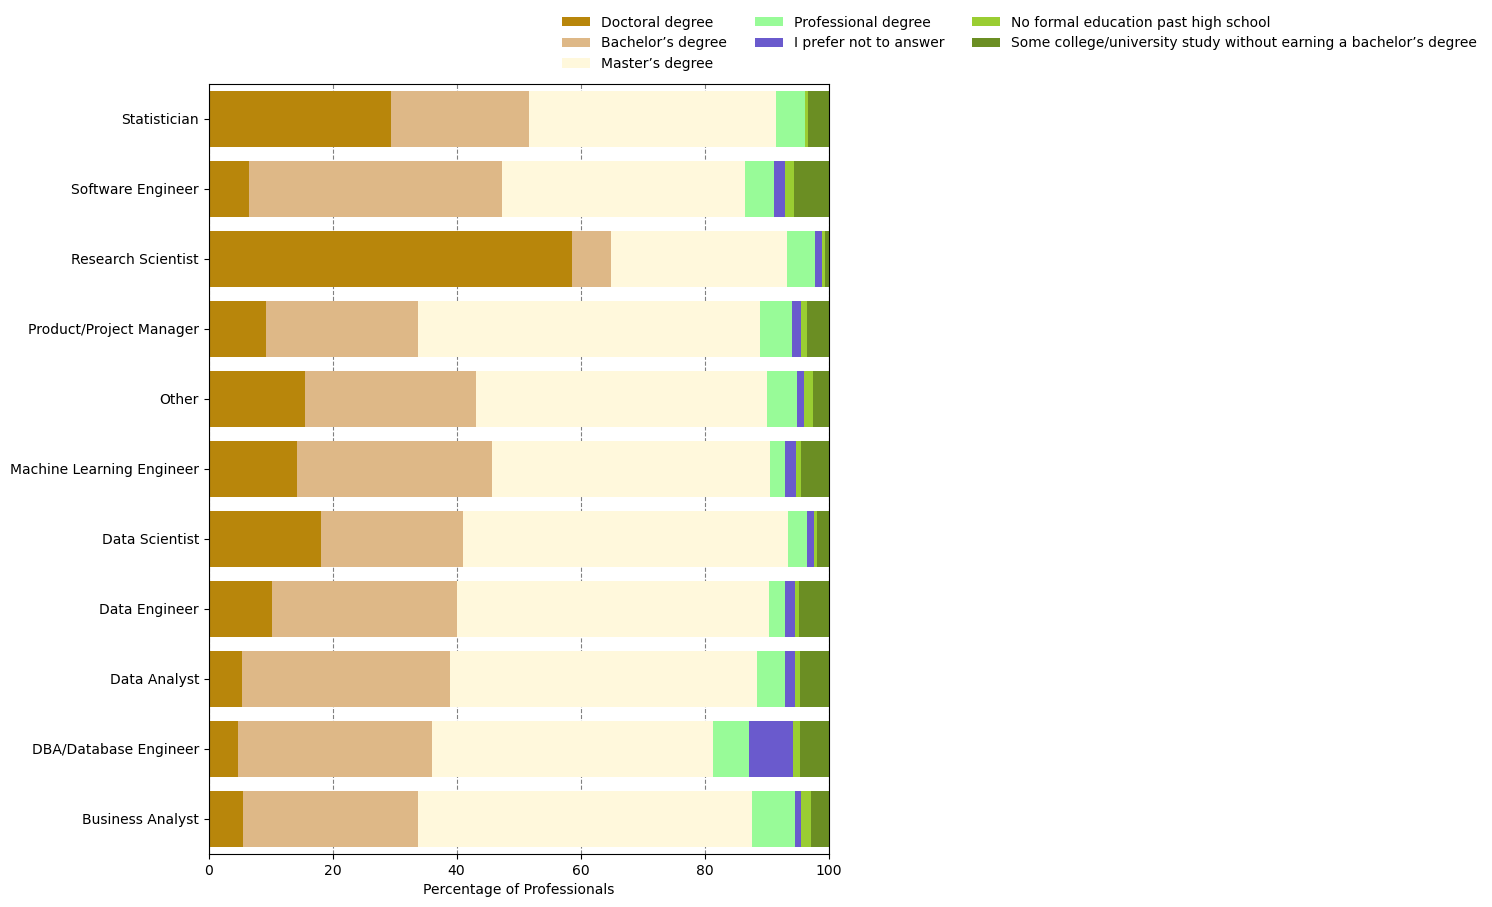

In [47]:
# generating stacked bar plot
job_titles=['Business Analyst', 'DBA/Database Engineer', 'Data Analyst',
       'Data Engineer', 'Data Scientist', 'Machine Learning Engineer',
       'Other', 'Product/Project Manager', 'Research Scientist',
       'Software Engineer', 'Statistician']

education_levels=['Doctoral degree', 'Bachelor’s degree', 'Master’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree']

fig,ax=plt.subplots(1,figsize=(8,10))
left=len(edu_counts)*[0]
for idx,name in enumerate(education_levels):
    plt.barh(edu_counts.index,edu_counts[name],left=left,color=col1[idx])
    left+=edu_counts[name]
plt.legend(education_levels,bbox_to_anchor=([0.55, 1, 0, 0]),ncol=3,frameon=False)
plt.xlabel('Percentage of Professionals')


# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.autoscale(enable=True, axis='x', tight=True)

>As can be seen from the above plot,masters degree holders form the largest propotion of people accross all data professions,except research scientists followed by bachelor's degree.Majority of research scientists have Phds. So getting higher education is important for being a data professional

#### 2.10 Count of professionals accross enterprises of different sizes

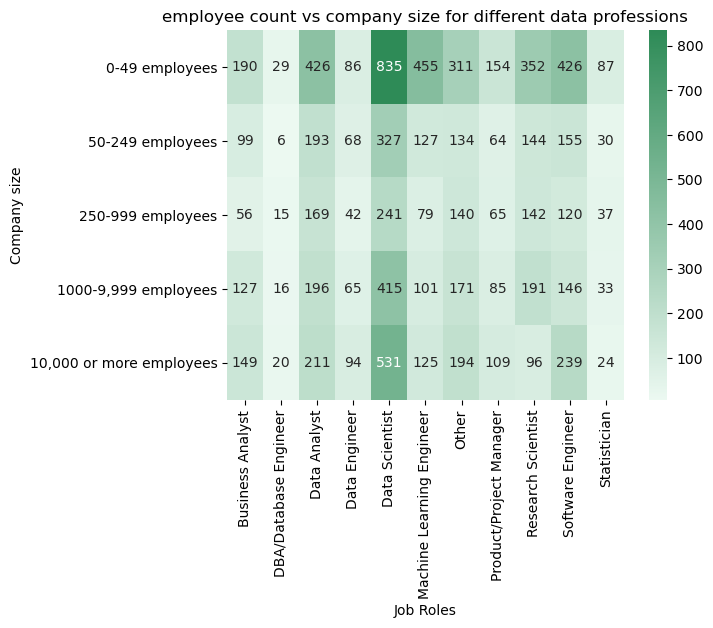

In [48]:
#Q20,Q5
c_size=['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees']
comp_classes = pd.api.types.CategoricalDtype(ordered=True, categories=c_size)
prof['Q20']=prof['Q20'].astype(comp_classes)

comp_size=prof.groupby(['Q20','Q5']).count()['avg_compensation'].reset_index(name='count')
comp_size=comp_size.pivot(index='Q20',columns='Q5',values='count')

c2=sns.light_palette('seagreen',as_cmap=True)
sns.heatmap(comp_size,annot=True,fmt='d',cmap=c2);
plt.xlabel('Job Roles')
plt.ylabel('Company size');
plt.title('employee count vs company size for different data professions');

>Working in startups seem to be very common among data professionals, followed by very big companies.Also data scientists form the bulk of the data professionals, followed by Data Analysts and Software Engineers

#### 2.11 Pay Variation accross different company sizes

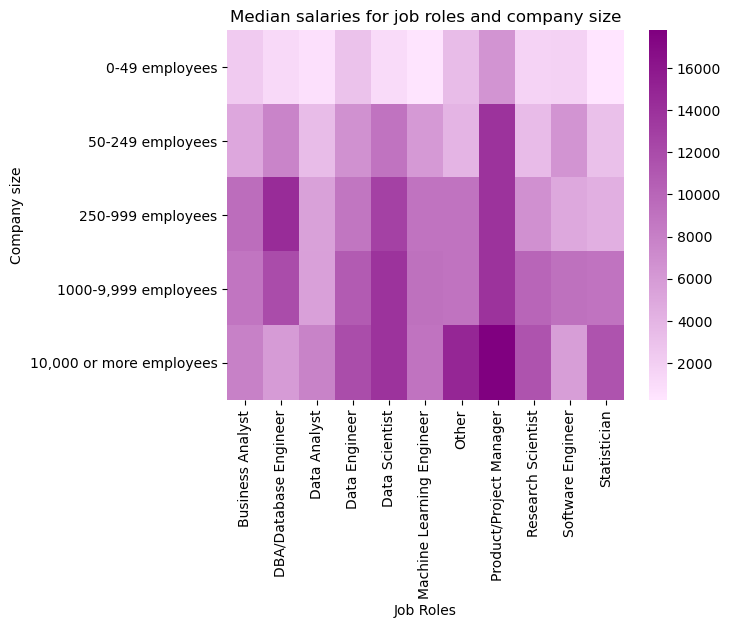

In [49]:

sal_count=prof.groupby(['Q20','Q5']).median()['comp_mac'].reset_index(name='Median_salary')
sal_count=sal_count.pivot_table(index='Q20',columns='Q5',values='Median_salary')

c3=sns.light_palette('purple',as_cmap=True)
sns.heatmap(sal_count,cmap=c3)
plt.title('Median salaries for job roles and company size')
plt.ylabel('Company size')
plt.xlabel('Job Roles');

>So in general it seems like bigger companies pay higher salaries.Salaries of product/project manager seems to be the highest accross different sized companies

#### 2.12 Machine learning practices across companies of different sizes

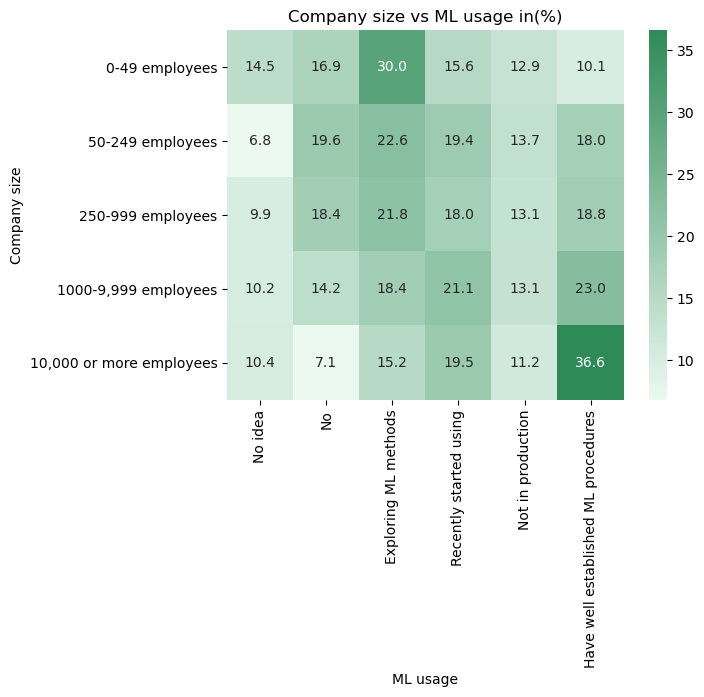

In [50]:
#Q22,Q20
lvl_map={'We are exploring ML methods (and may one day put a model into production)':'Exploring ML methods',
       'We have well established ML methods (i.e., models in production for more than 2 years)':'Have well established ML procedures',
       'No (we do not use ML methods)':'No',
       'We recently started using ML methods (i.e., models in production for less than 2 years)':'Recently started using',
       'I do not know':'No idea',
       'We use ML methods for generating insights (but do not put working models into production)':'Not in production'}

prof['Q22']=prof['Q22'].map(lvl_map)

s_list=['No idea','No','Exploring ML methods','Recently started using','Not in production',
        'Have well established ML procedures']
m_class=pd.api.types.CategoricalDtype(ordered=True, categories=s_list)
prof['Q22']=prof['Q22'].astype(m_class)

method_count=prof.groupby(['Q20','Q22']).count()['comp_mac'].reset_index(name='count')
method_count=method_count.pivot(index='Q20',columns='Q22',values='count')

# Converting values in pivot table to percentage values
for x in method_count.index:
    method_count.loc[x,:]=np.round(100*method_count.loc[x,:]/method_count.loc[x,:].sum(axis=0),2)

c2=sns.light_palette('seagreen',as_cmap=True)
sns.heatmap(method_count,annot=True,fmt='0.1f',cmap=c2);
plt.xlabel('ML usage')
plt.ylabel('Company size');
plt.title('Company size vs ML usage in(%)');

>From the plot it can be seen that big corporations are the largest users of ML in projects and products and that ML usage increases gradually with increasing company size. Small companies are still exploring ML methods

#### 2.13 Development Environments

In [51]:
def get_unique_levels(q,df=prof):
    '''expects a list containing the question numbers from which values ae to be extracted and the dataframe containing the columns'''
    '''returns a list of unique values in each column'''
    '''each column must have 1 unique value and nan'''
    
    values=[]
    for x in q:
        temp=df[x].unique()
        for y in temp:
            if y==y:
                values.append(y.strip())
    return values

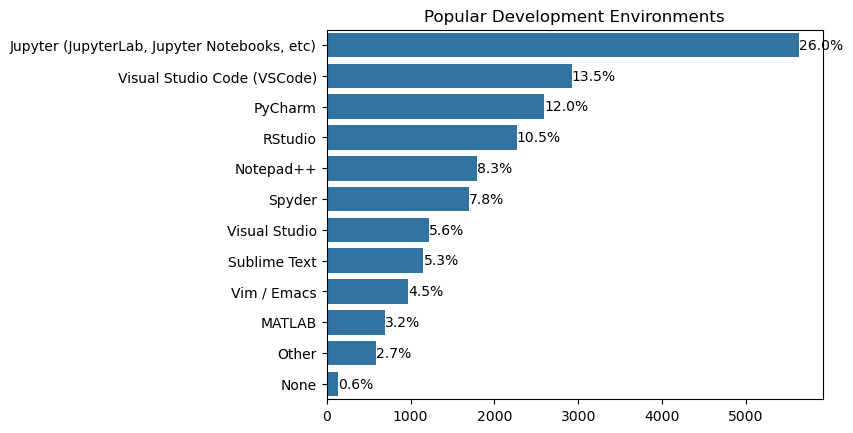

In [52]:
#Q9

q9=[x for x in prof.columns if 'Q9' in x]
counts=prof[q9].count()
val=get_unique_levels(q9)
counts=sorted(list(zip(val,counts)),key=lambda x:x[1],reverse=True)

x1=[x[0] for x in counts]
y1=[x[1] for x in counts]

sns.barplot(y1,x1,color=base_color);

# displaying propotions on bars
for i in range(len(y1)):
    count=y1[i]
    pct_string='{:0.1f}%'.format(100*count/np.sum(y1))
    plt.text(count+1,i,pct_string,va='center',color='black')
plt.title('Popular Development Environments');


Jupyter notebook seems to be by far the most popular tool for performing data related tasks followed by vscode and pycharm

#### 2.14 Hosted Notebooks

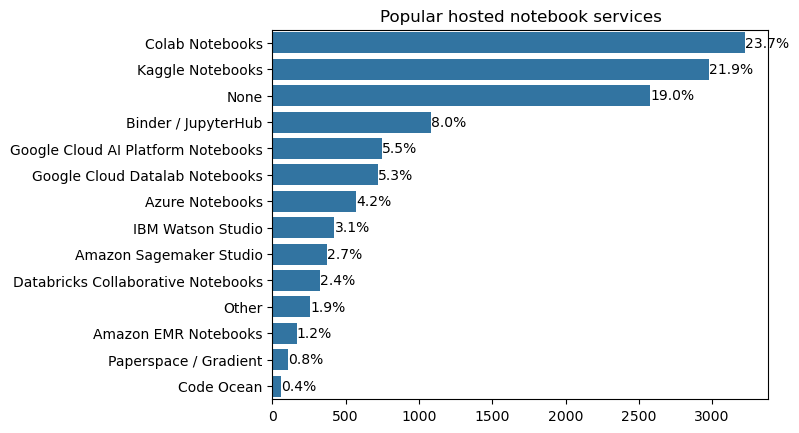

In [53]:
#Q10
q10=[x for x in prof.columns if 'Q10' in x]
counts=prof[q10].count()
val=get_unique_levels(q10)
counts=sorted(list(zip(val,counts)),key=lambda x:x[1],reverse=True)

x1=[x[0] for x in counts]
y1=[x[1] for x in counts]

sns.barplot(y1,x1,color=base_color);

# displaying propotions on bars
for i in range(len(y1)):
    count=y1[i]
    pct_string='{:0.1f}%'.format(100*count/np.sum(y1))
    plt.text(count+1,i,pct_string,va='center',color='black')
plt.title('Popular hosted notebook services');


Colab and Kaggle notebooks seem to be the most popular hosted notebooks. It's surprising that almost 19% people dont use any of the hosted notebook services given the amount of compute power available for free

#### 2.15 Coding Experience needed for different professions

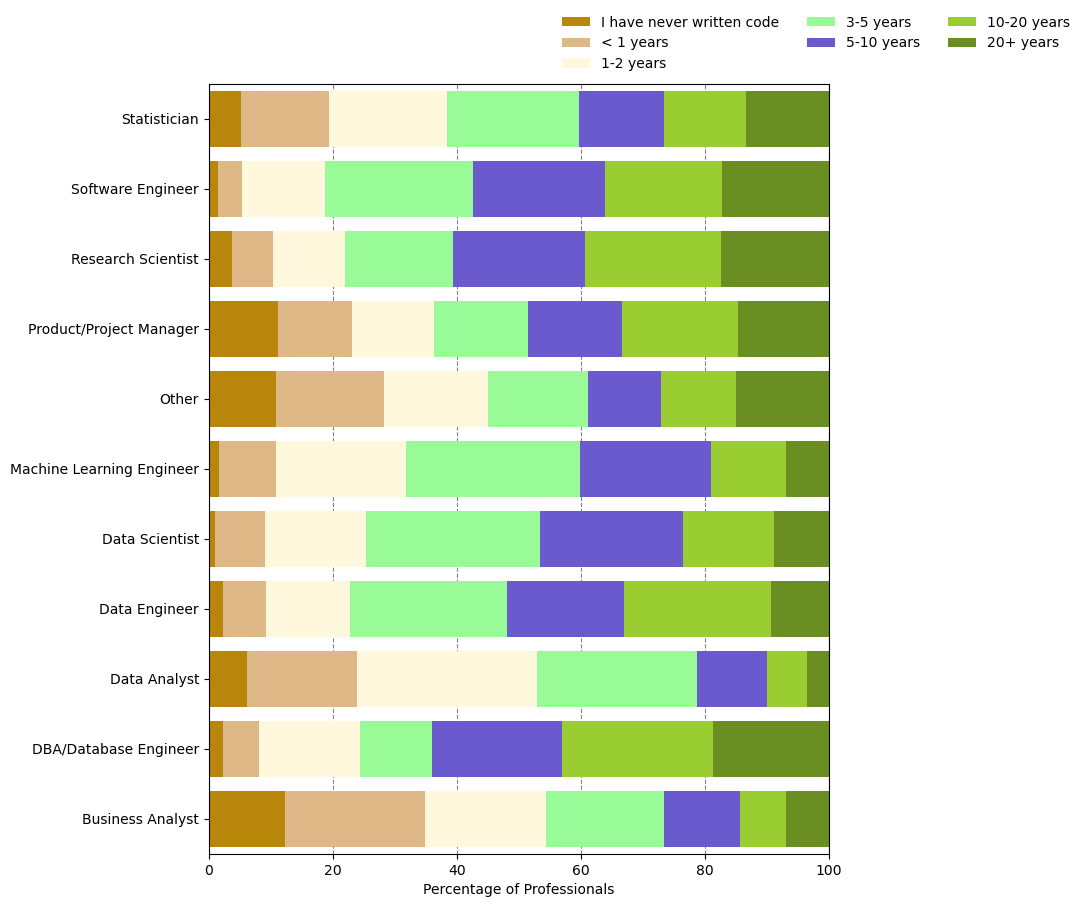

In [54]:
exp=['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years', 
     '20+ years']
exp_class=pd.api.types.CategoricalDtype(ordered=True,categories=exp)
prof['Q6']=prof['Q6'].astype(exp_class)
exp_count=prof.groupby(['Q5','Q6']).count()['comp_mac'].reset_index(name='count')
exp_count=exp_count.pivot_table(index='Q5',columns='Q6',values='count')

# Converting values to percentages
for x in exp_count.index:
    exp_count.loc[x,:]=np.round(100*exp_count.loc[x,:]/exp_count.loc[x,:].sum(axis=0),2)


fig,ax=plt.subplots(1,figsize=(8,10))
left=len(exp_count)*[0]  # setting the location for left end of the bars

for idx,name in enumerate(exp_count.columns):
    plt.barh(exp_count.index,exp_count[name],color=col1[idx],left=left)
    left+=exp_count[name]
plt.legend(exp_count.columns.tolist(),bbox_to_anchor=([0.55, 1, 0, 0]),ncol=3,frameon=False)
plt.xlabel('Percentage of Professionals')


# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.autoscale(enable=True, axis='x', tight=True)

It's an interesting question to ask how much coding experience is required to get into these fields.It can be seen that around 30% of pofessionals accross different job titles have less than 2 years of coding experience.

#### 2.16 Programming Languages to learn

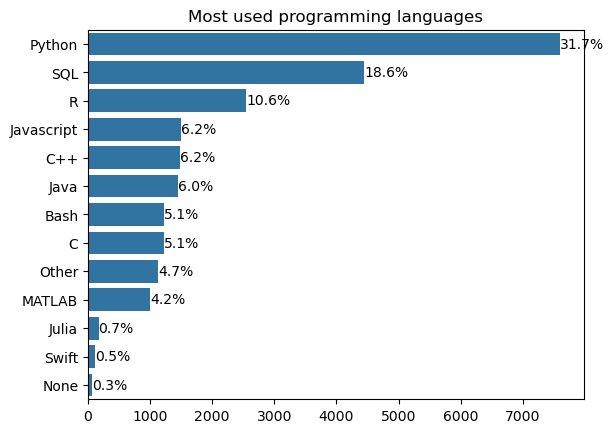

In [55]:
#Q7 :
q7=[x for x in prof.columns if 'Q7' in x]
counts=prof[q7].count()
val=get_unique_levels(q7)
counts=sorted(list(zip(val,counts)),key=lambda x:x[1],reverse=True)

x1=[x[0] for x in counts]
y1=[x[1] for x in counts]

sns.barplot(y1,x1,color=base_color);

# displaying propotions on bars
for i in range(len(y1)):
    count=y1[i]
    pct_string='{:0.1f}%'.format(100*count/np.sum(y1))
    plt.text(count+1,i,pct_string,va='center',color='black')
plt.title('Most used programming languages');


Python is by far the most used language in data related jobs while SQL comes in at second. This is not surprising since SQL plays a mojor role in accessing data from large data warehouses. Thus knowing SQL goes a long way in boosting career prospects of data professionals

#### 2.17 Popular Visualization libraries

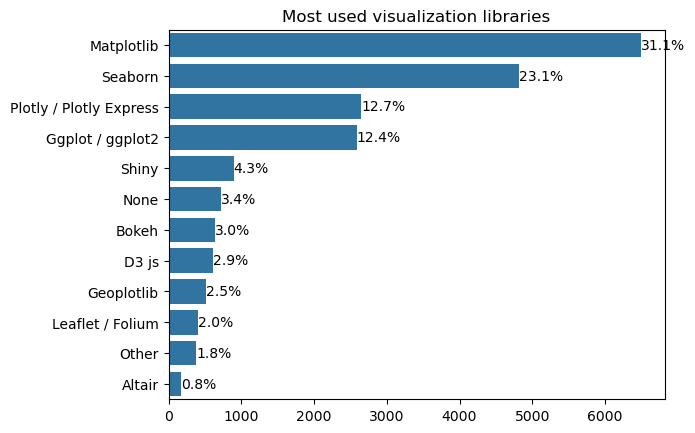

In [56]:
#Q14
q14=[x for x in prof.columns if 'Q14' in x]
counts=prof[q14].count()
val=get_unique_levels(q14)
counts=sorted(list(zip(val,counts)),key=lambda x:x[1],reverse=True)

x1=[x[0] for x in counts]
y1=[x[1] for x in counts]

sns.barplot(y1,x1,color=base_color);

# displaying propotions on bars
for i in range(len(y1)):
    count=y1[i]
    pct_string='{:0.1f}%'.format(100*count/np.sum(y1))
    plt.text(count+1,i,pct_string,va='center',color='black')
plt.title('Most used visualization libraries');


Matplotlib and Seaborn are the most used data visualization libraries since most people start out with these. Plotly produces interactve plots, but requires knowledge of data preprocessing to get certain types of visualizations. ggplot is a visualization library for R

#### 2.18 Years of Machine Learning experience across different professions

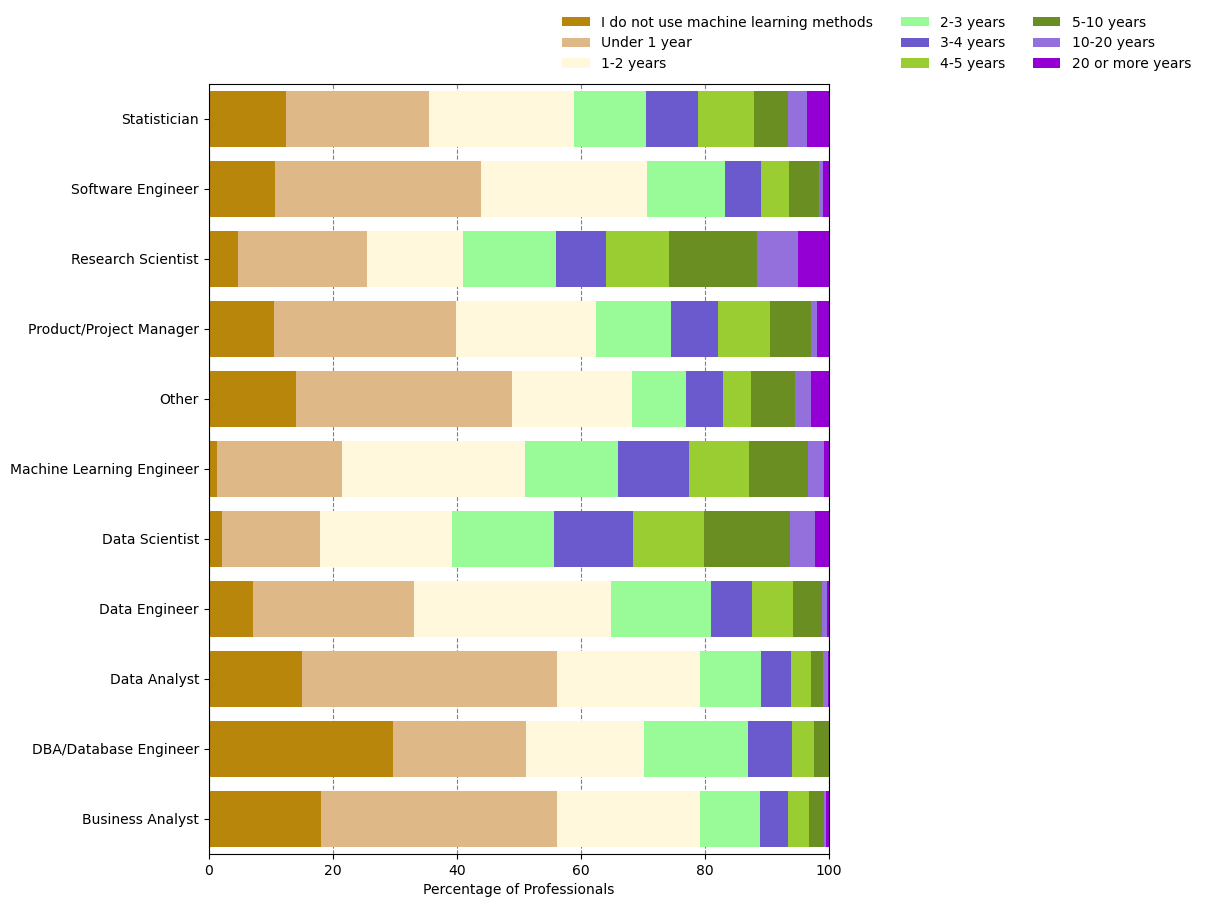

In [57]:
#Q15,Q5
exp=['I do not use machine learning methods','Under 1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-10 years',
    '10-20 years','20 or more years']
exp_class=pd.api.types.CategoricalDtype(ordered=True,categories=exp)
prof['Q15']=prof['Q15'].astype(exp_class)
exp_count=prof.groupby(['Q5','Q15']).count()['comp_mac'].reset_index(name='count')
exp_count=prof.groupby(['Q5','Q15']).count()['comp_mac'].reset_index(name='count')
exp_count=exp_count.pivot_table(index='Q5',columns='Q15',values='count')

# Converting values to percentages
for x in exp_count.index:
    exp_count.loc[x,:]=np.round(100*exp_count.loc[x,:]/exp_count.loc[x,:].sum(axis=0),2)


fig,ax=plt.subplots(1,figsize=(8,10))
left=len(exp_count)*[0]  # setting the location for left end of the bars
for idx,name in enumerate(exp_count.columns):
    plt.barh(exp_count.index,exp_count[name],color=col1[idx],left=left)
    left+=exp_count[name]
plt.legend(exp_count.columns.tolist(),bbox_to_anchor=([0.55, 1, 0, 0]),ncol=3,frameon=False)
plt.xlabel('Percentage of Professionals')


# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.autoscale(enable=True, axis='x', tight=True)

About 40% of the people in all professions have machine learning experience of less than 2 years.Professionals like data and business analysts mostly do not have machine learning experience. Also 2 years of coding experience is subjective and can mean different things for different individuals depending on where they studied and number of hours they put in. But 2 years of ML experience is a reasonable goal for people trying to get into the field to strive towards

#### 2.19 Usage of ML Frameworks

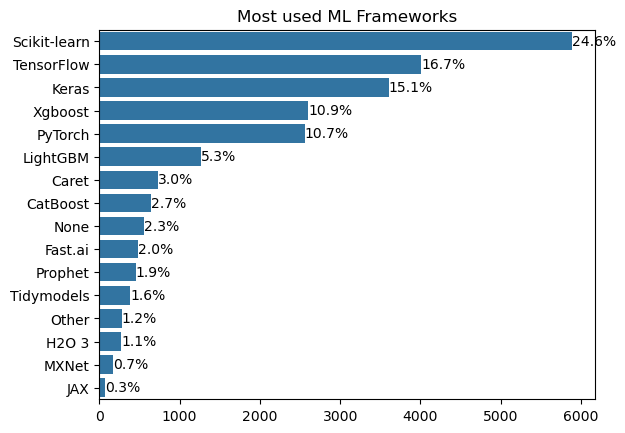

In [58]:
#Q16
q16=[x for x in prof.columns if 'Q16' in x]
counts=prof[q16].count()
val=get_unique_levels(q16)
counts=sorted(list(zip(val,counts)),key=lambda x:x[1],reverse=True)

x1=[x[0] for x in counts]
y1=[x[1] for x in counts]

sns.barplot(y1,x1,color=base_color);

# displaying propotions on bars
for i in range(len(y1)):
    count=y1[i]
    pct_string='{:0.1f}%'.format(100*count/np.sum(y1))
    plt.text(count+1,i,pct_string,va='center',color='black')
plt.title('Most used ML Frameworks');


Scikit learn, Tensorflow and keras are the most popular ML Frameworks which is mostly what people learn while trying to get into this domain

#### 2.20 Preffered learning Platforms

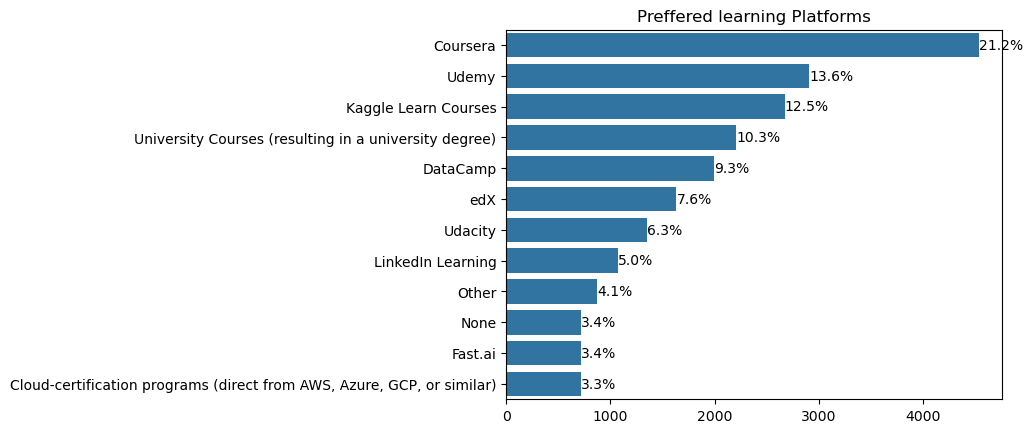

In [59]:
#Q37
q37=[x for x in prof.columns if 'Q37' in x]
counts=prof[q37].count()
val=get_unique_levels(q37)
counts=sorted(list(zip(val,counts)),key=lambda x:x[1],reverse=True)

x1=[x[0] for x in counts]
y1=[x[1] for x in counts]

sns.barplot(y1,x1,color=base_color);

# displaying propotions on bars
for i in range(len(y1)):
    count=y1[i]
    pct_string='{:0.1f}%'.format(100*count/np.sum(y1))
    plt.text(count+1,i,pct_string,va='center',color='black')
plt.title('Preffered learning Platforms');

Coursera seems to be the top platform for learning data science followed by Udemy and Kaggle.

#### 2.21 Most frequently used ML algorithms

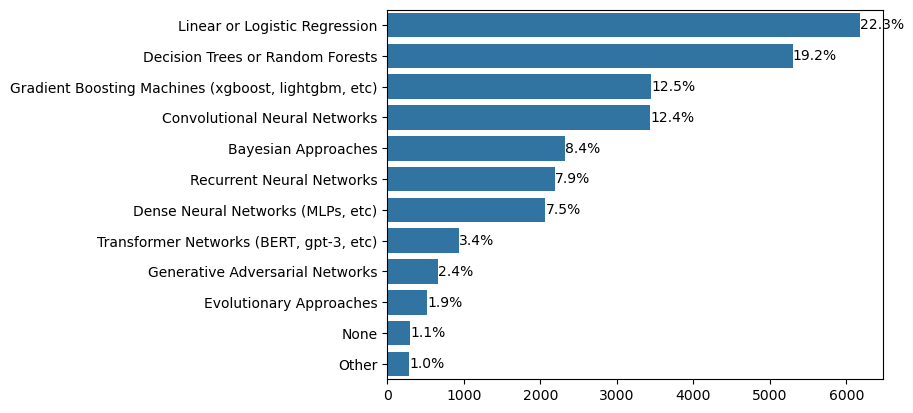

In [60]:

q17=[x for x in prof.columns if 'Q17' in x]
counts=prof[q17].count()
val=get_unique_levels(q17)
counts=sorted(list(zip(val,counts)),key=lambda x:x[1],reverse=True)

x1=[x[0] for x in counts]
y1=[x[1] for x in counts]

sns.barplot(y1,x1,color=base_color);

# displaying propotions on bars
for i in range(len(y1)):
    count=y1[i]
    pct_string='{:0.1f}%'.format(100*count/np.sum(y1))
    plt.text(count+1,i,pct_string,va='center',color='black')

Despite the large number of sophistiacted ML algorithms, linear/logistic regression and tree based methods remain the top algorithms used for business purposes.This is because the results of these algorithms can be easily explained while more sophisticated deep learning methods may not be interpreted so readily.This also shows the importance of model interpretability for use in business cases 

#### References
1. [Kaggle Project From Scratch](https://www.kaggle.com/kenjee/kaggle-project-from-scratch#Part-1---How-to-Start-a-Kaggle-Competition)

2. [Enthusiast to Data Professional - What changes?](https://www.kaggle.com/spitfire2nd/enthusiast-to-data-professional-what-changes)

3. [Visualization & Analysis](https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis)

4. [Treasure Hunt - what gives to be REALLY good?](https://www.kaggle.com/andradaolteanu/treasure-hunt-what-gives-to-be-really-good)

5. [Anaconda state of data science survey](https://www.anaconda.com/state-of-data-science-2020)

6. [Big Mac Index](https://www.economist.com/big-mac-index)
